# LAB TASK

In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
import statsmodels.api as sm
import matplotlib.pyplot as plt
import numpy as np

In [3]:
# 1. Read the BostonHousing Dataset
df = pd.read_csv('BostonHousing.csv')

In [4]:
print(df.isnull().sum())

# Clean dataset
df = df.dropna()
print("------------- AFTER -------------")
print(df.isnull().sum())

crim       0
zn         0
indus      0
chas       0
nox        0
rm         5
age        0
dis        0
rad        0
tax        0
ptratio    0
b          0
lstat      0
medv       0
dtype: int64
------------- AFTER -------------
crim       0
zn         0
indus      0
chas       0
nox        0
rm         0
age        0
dis        0
rad        0
tax        0
ptratio    0
b          0
lstat      0
medv       0
dtype: int64


Outliers for crim are 367    13.5222
371     9.2323
373    11.1081
374    18.4982
375    19.6091
        ...   
468    15.5757
469    13.0751
477    15.0234
478    10.2330
479    14.3337
Name: crim, Length: 66, dtype: float64
Outliers for zn are 39     75.0
40     75.0
54     75.0
55     90.0
56     85.0
       ... 
351    60.0
352    60.0
353    90.0
354    80.0
355    80.0
Name: zn, Length: 68, dtype: float64
Outliers for indus are Series([], Name: indus, dtype: float64)
Outliers for chas are 142    1
152    1
154    1
155    1
160    1
162    1
163    1
208    1
209    1
210    1
211    1
212    1
216    1
218    1
219    1
220    1
221    1
222    1
234    1
236    1
269    1
273    1
274    1
276    1
277    1
282    1
283    1
356    1
357    1
358    1
363    1
364    1
369    1
370    1
372    1
Name: chas, dtype: int64
Outliers for nox are Series([], Name: nox, dtype: float64)
Outliers for rm are 97     8.069
98     7.820
162    7.802
163    8.375
166    7.929
180    7.765
186

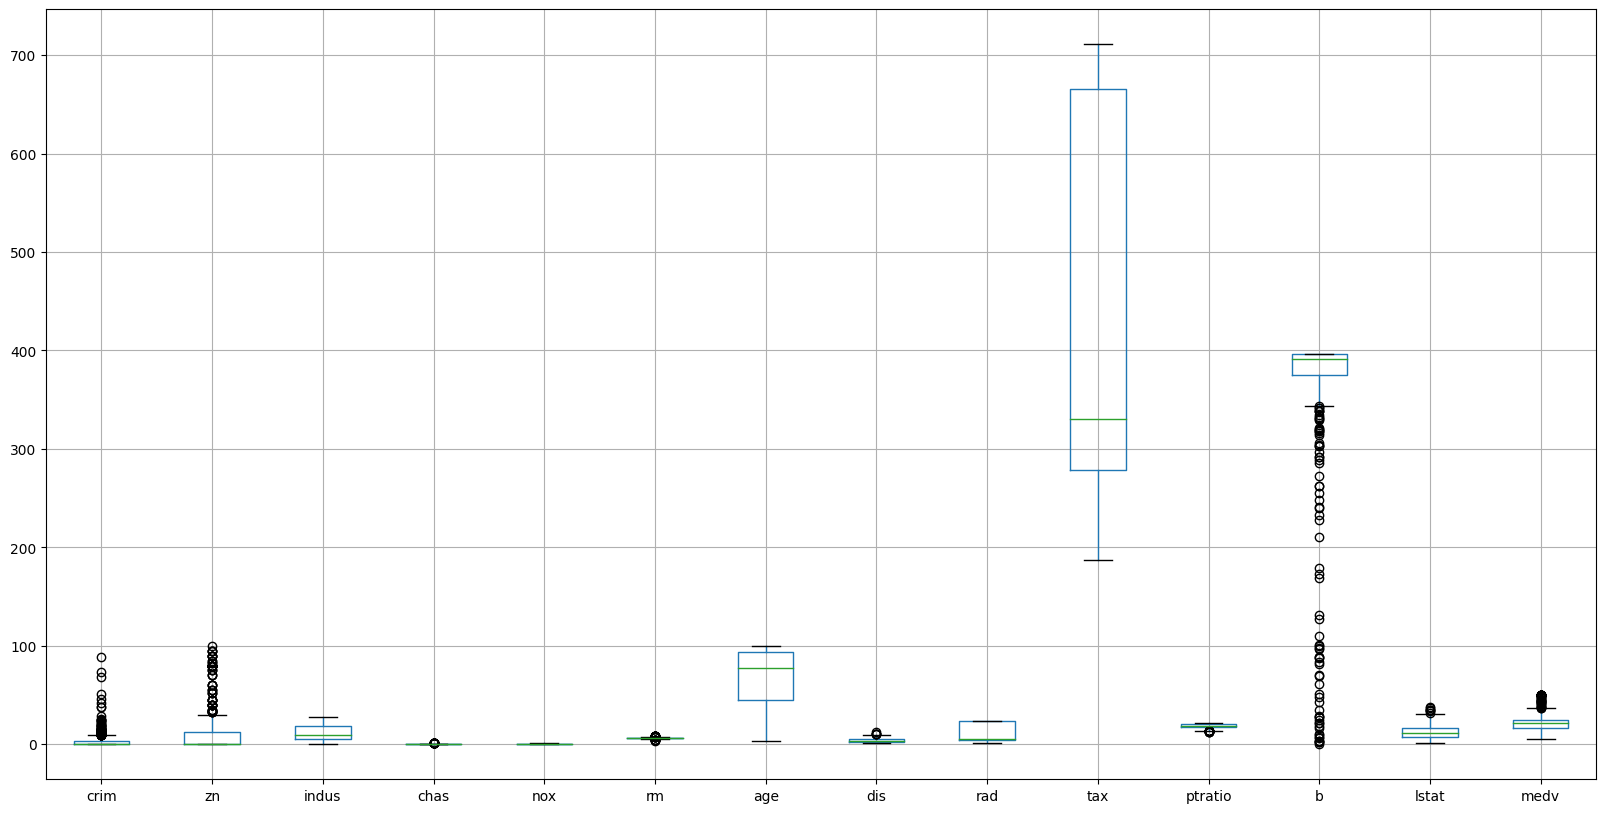

In [4]:
# Print outliers
for column in df.columns:
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    outliers = df[(df[column] < (Q1 - 1.5 * IQR)) | (df[column] > (Q3 + 1.5 * IQR))][column]
    print(f"Outliers for {column} are {outliers}")

# Show boxplot
df.boxplot(figsize=(20,10))
plt.show()

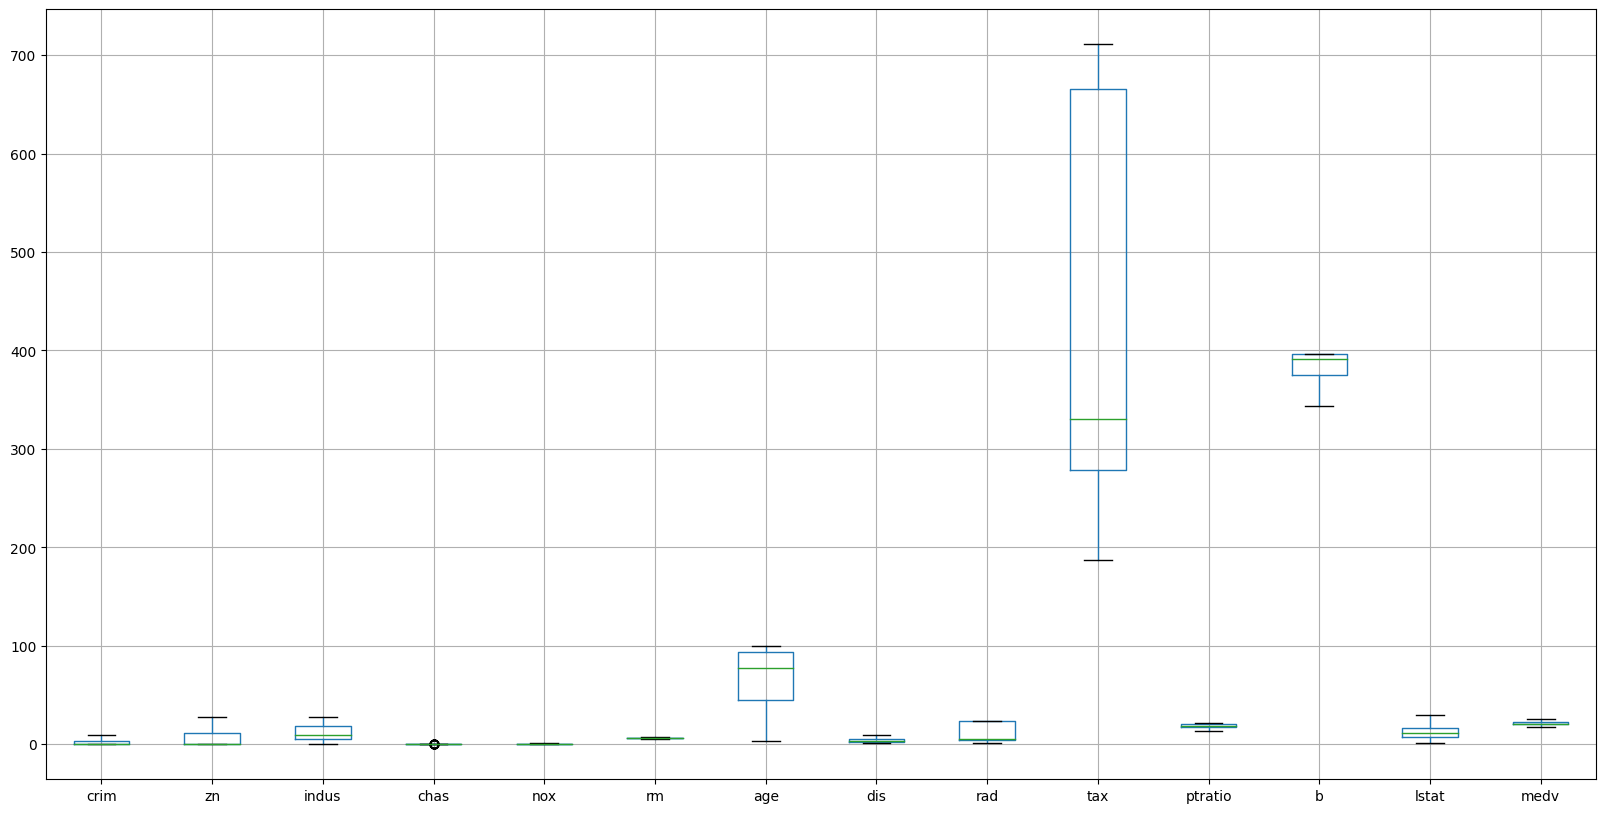

In [20]:
for column in df.columns:
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    mean = df[column].mean()
    df[column] = np.where(((df[column] < (Q1 - 1.5 * IQR)) | (df[column] > (Q3 + 1.5 * IQR))), mean, df[column])


# Show boxplot after replacing outliers
df.boxplot(figsize=(20,10))
plt.show()

In [21]:
# 2. Fit the linear Multi regression.
X = df[['crim', 'zn', 'indus', 'chas', 'nox', 'rm', 'age', 'dis', 'rad', 'tax', 'ptratio', 'b', 'lstat']]
Y = df['medv']

In [31]:
# 3. Split the data into 80%:20% Ratio.

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=12)   

In [32]:
# 4. Use the 80% data to fit the regression function.

model = LinearRegression()
model.fit(X_train, Y_train)

LinearRegression()

In [33]:
# 5. Use remaining 20% data for the testing. 
Y_pred = model.predict(X_test)

In [34]:
# 6. Find the Squared R and MSE.

print('R2 Score:', r2_score(Y_test, Y_pred))
print('Mean Squared Error:', mean_squared_error(Y_test, Y_pred))

R2 Score: 0.12532087892856214
Mean Squared Error: 2.2724288138438724


In [35]:
# 8. Find the P-Value against each variable. 

X2 = sm.add_constant(X)
est = sm.OLS(Y, X2)
est2 = est.fit()
print(est2.summary())


                            OLS Regression Results                            
Dep. Variable:                   medv   R-squared:                       0.208
Model:                            OLS   Adj. R-squared:                  0.188
Method:                 Least Squares   F-statistic:                     10.66
Date:                Wed, 03 Apr 2024   Prob (F-statistic):           6.89e-19
Time:                        06:51:11   Log-Likelihood:                -893.26
No. Observations:                 501   AIC:                             1813.
Df Residuals:                     488   BIC:                             1867.
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         23.2533      2.523      9.216      0.0

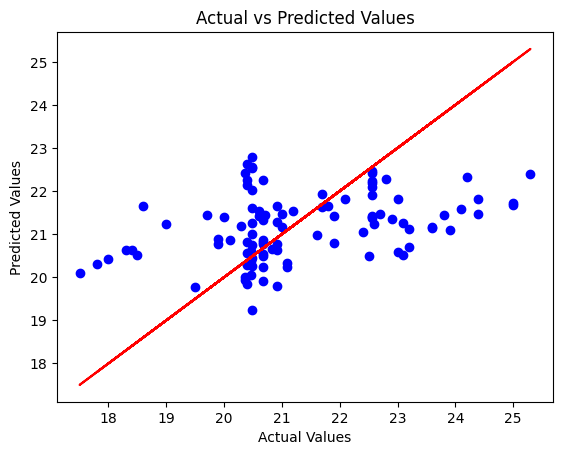

In [36]:
import matplotlib.pyplot as plt

# Scatter plot of actual test values
plt.scatter(Y_test, Y_pred, color='blue')

# Regression line
plt.plot(Y_test, Y_test, color='red')

plt.title('Actual vs Predicted Values')
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')

plt.show()


In [28]:
# 9. Remove variables having with P>0.005 and do the  multi regression on remaining attributes. 


# Get p-values
p_values = est2.pvalues

# Get variables with P>0.005
vars_with_p_greater_than_005 = p_values[p_values > 0.005].index

# Remove the constant
vars_with_p_greater_than_005 = [var for var in vars_with_p_greater_than_005 if var != 'const']

# Drop these variables from X
X_filtered = X.drop(vars_with_p_greater_than_005, axis=1)

# Split the data again
X_train_filtered, X_test_filtered, Y_train, Y_test = train_test_split(X_filtered, Y, test_size=0.2, random_state=12)

# Fit the model again
model_filtered = LinearRegression()
model_filtered.fit(X_train_filtered, Y_train)

# Make predictions
Y_pred_filtered = model_filtered.predict(X_test_filtered)

# Print R2 Score and MSE
print('Filtered R2 Score:', r2_score(Y_test, Y_pred_filtered))
print('Filtered Mean Squared Error:', mean_squared_error(Y_test, Y_pred_filtered))


Filtered R2 Score: 0.09181609475087549
Filtered Mean Squared Error: 2.3594747203172446


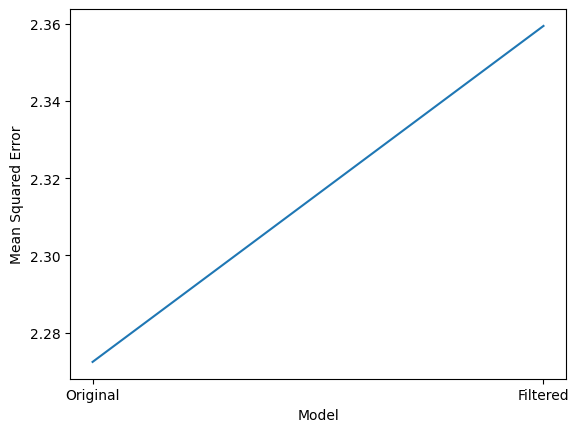

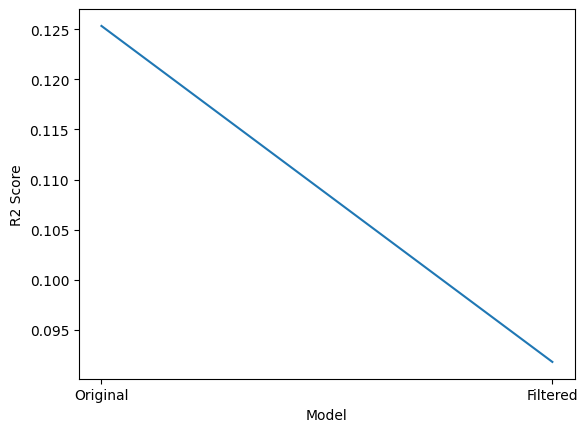

In [29]:
# 11. Plot all MSE, and Squared R line graph and submit the resultant Jupyter notebook along with a seperate PDF file of the results and submit.

plt.plot(['Original', 'Filtered'], [mean_squared_error(Y_test, Y_pred), mean_squared_error(Y_test, Y_pred_filtered)])
plt.xlabel('Model')
plt.ylabel('Mean Squared Error')
plt.show()

plt.plot(['Original', 'Filtered'], [r2_score(Y_test, Y_pred), r2_score(Y_test, Y_pred_filtered)])
plt.xlabel('Model')
plt.ylabel('R2 Score')
plt.show()
